In [1]:
from utils import *

labels = loadLabels('CamVid/')

imageSize = (320, 256)

train_x, train_y = loadDataset('CamVid/', 'train', 369, labels, imageSize)

In [2]:
model = createUNet([imageSize[1], imageSize[0], 3], [3, 3], 5, 4, len(labels))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [3]:
trained = model.fit(train_x, train_y, batch_size=5, epochs=60)

Epoch 1/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.1509 - loss: 0.3860
Epoch 2/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.4705 - loss: 0.0866
Epoch 3/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - accuracy: 0.5991 - loss: 0.0670
Epoch 4/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.6202 - loss: 0.0621
Epoch 5/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step - accuracy: 0.6346 - loss: 0.0578
Epoch 6/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 0.6294 - loss: 0.0570
Epoch 7/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - accuracy: 0.6414 - loss: 0.0542
Epoch 8/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - accuracy: 0.6442 - loss: 0.0542
Epoch 9/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.6528 - loss: 0.0528
Epoch 10/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - accuracy: 0.6573 - loss: 0.0519
Epoch 11/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - accuracy: 0.6673 - loss: 0.0513
Epoch 12/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 14

In [4]:
del train_x, train_y
test_x, test_y = loadDataset('CamVid/', 'test', 20, labels, imageSize)

test_scores = model.evaluate(test_x, test_y, batch_size=2, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

10/10 - 1s - 58ms/step - accuracy: 0.7788 - loss: 0.0411
Test loss: 0.041149772703647614
Test accuracy: 0.7787927389144897


In [5]:
predictions = model.predict(test_x, batch_size=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


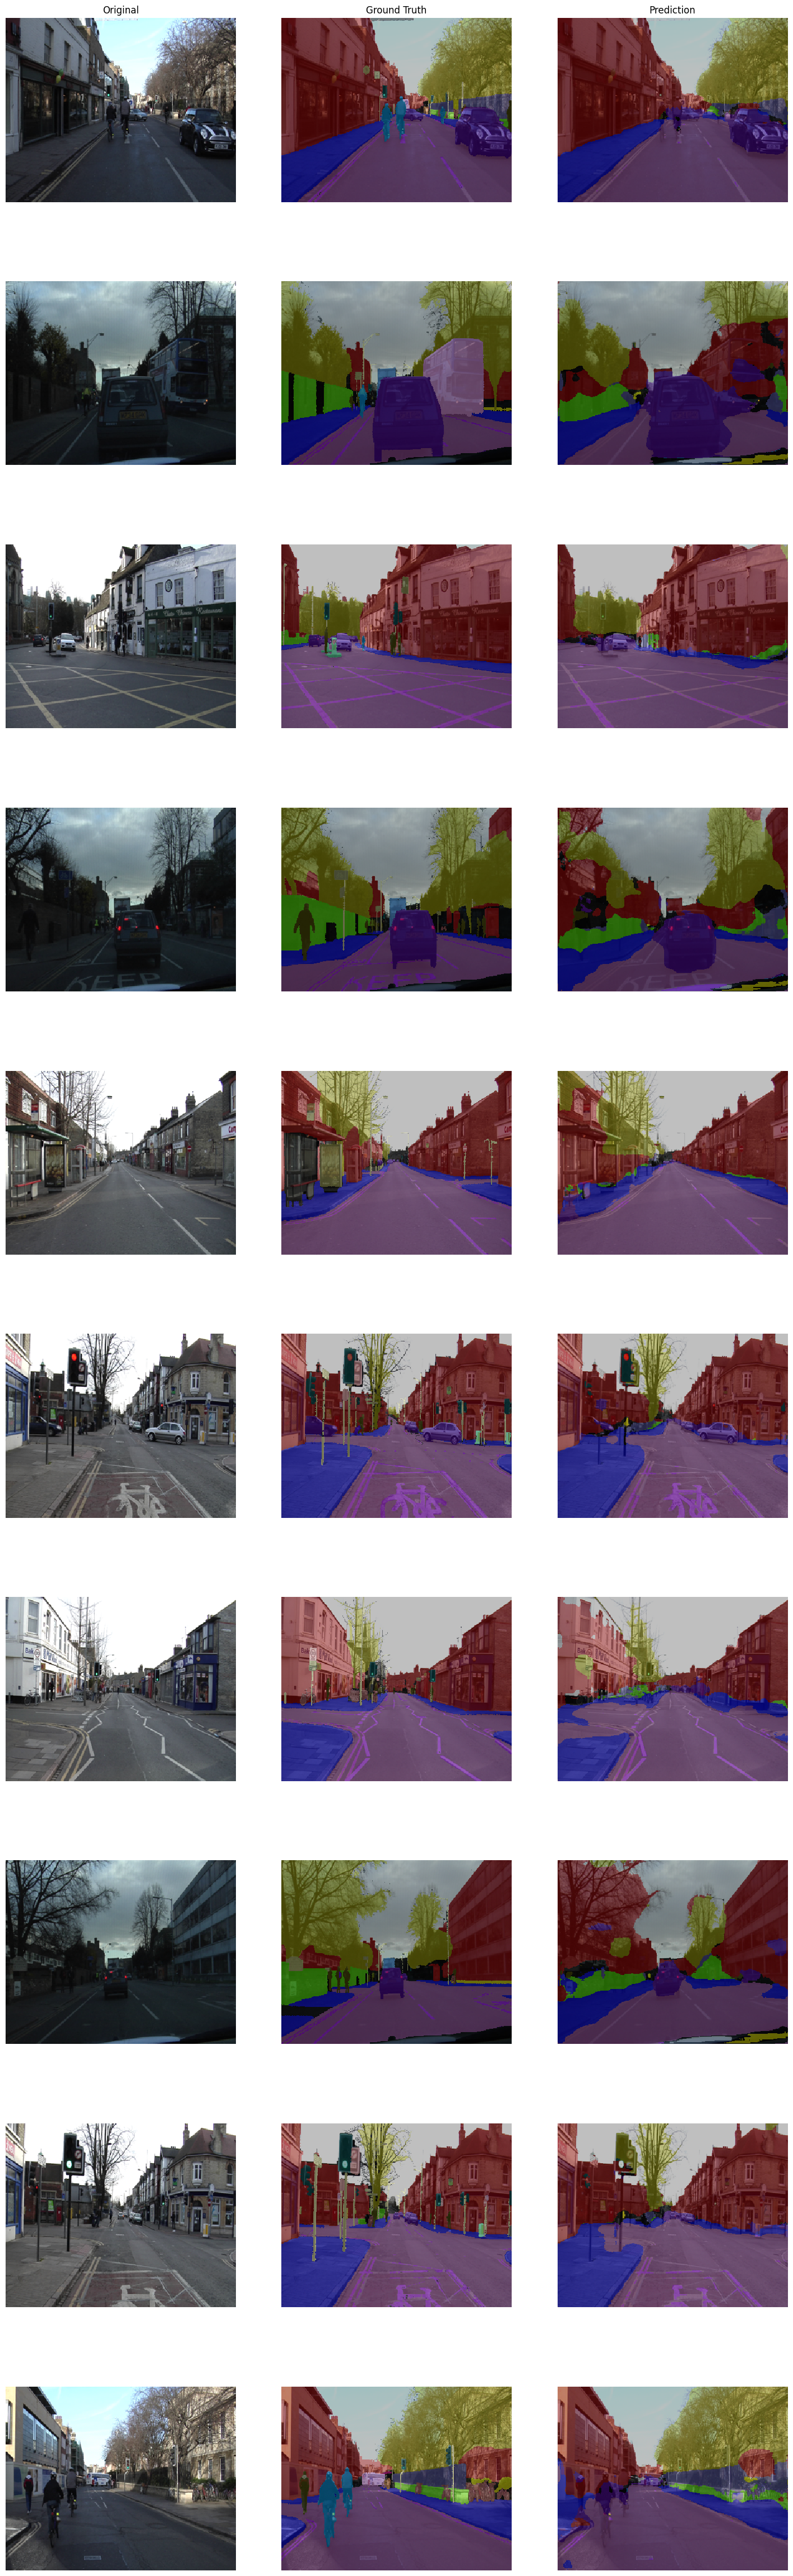

In [6]:
import matplotlib.pyplot as plt

colors = np.array([label[1] for label in labels])

def colorizeImage(image):
    return colors[np.argmax(image, axis=2)]


totalCheck = 10

fig = plt.figure(figsize=(18, 6 * totalCheck))
for checkNum in range(totalCheck):
    predictionToShow = predictions[checkNum]
    groundTruth = test_y[checkNum]
    
    originalImage = test_x[checkNum]
    groundImage = (colorizeImage(groundTruth) / 255.0 + originalImage) * 0.5
    predictionImage = (colorizeImage(predictionToShow) / 255.0 + originalImage) * 0.5

    fig.add_subplot(totalCheck, 3, checkNum * 3 + 1) 
    plt.axis('off')
    if not checkNum:
        plt.title("Original")
    plt.imshow(originalImage, interpolation='nearest')
    
    fig.add_subplot(totalCheck, 3, checkNum * 3 + 2) 
    plt.axis('off')
    if not checkNum:
        plt.title("Ground Truth")
    plt.imshow(groundImage, interpolation='nearest')
    
    fig.add_subplot(totalCheck, 3, checkNum * 3 + 3)
    plt.axis('off')
    if not checkNum:
        plt.title("Prediction")
    plt.imshow(predictionImage, interpolation='nearest')

fig.savefig("C:/Users/dylan/Downloads/figure")

plt.show()

In [7]:
from datetime import datetime
dateString = datetime.now().strftime("%m.%d.%Y.%H")

model.save("Trained/trained " + dateString + ".keras")